In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn, optim
import torchvision

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:06<00:00, 26.2MB/s]


In [7]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(128*4*4, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 128*4*4)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20

for epoch in range(epochs):
  running_loss = 0.0
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

print("Finished Training")

Epoch 1, Loss: 1.394260325877238
Epoch 2, Loss: 0.9372269780644986
Epoch 3, Loss: 0.7538535032070988
Epoch 4, Loss: 0.6359531136464401
Epoch 5, Loss: 0.5396337015786693
Epoch 6, Loss: 0.46093270581594586
Epoch 7, Loss: 0.38715800738304146
Epoch 8, Loss: 0.3282463130513141
Epoch 9, Loss: 0.28259583107855407
Epoch 10, Loss: 0.24507455581051946
Epoch 11, Loss: 0.20787060494884438
Epoch 12, Loss: 0.18416098052527344
Epoch 13, Loss: 0.16959092420867275
Epoch 14, Loss: 0.14807589919832478
Epoch 15, Loss: 0.1372601417321128
Epoch 16, Loss: 0.1294616837045851
Epoch 17, Loss: 0.1216755385364043
Epoch 18, Loss: 0.11802851757310541
Epoch 19, Loss: 0.10643317795935685
Epoch 20, Loss: 0.1013723123010581
Finished Training


In [9]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 74.09%


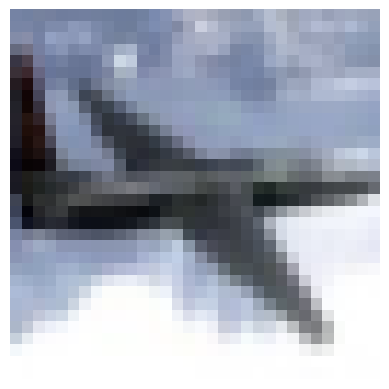

Predicted: plane, Actual: plane


In [11]:
import numpy as np
import random

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

random_idx = random.randint(0, len(testset) - 1)

image, label = testset[random_idx]

input_image = image.unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(input_image)
    _, predicted = torch.max(output, 1)

imshow(image)
print(f"Predicted: {classes[predicted.item()]}, Actual: {classes[label]}")